# Sparse Autoencoder?

A Sparse Autoencoder is a type of autoencoder that uses a sparsity constraint on the hidden layers. The idea is to force the autoencoder to learn more useful, high-level features in the data by making it difficult for the autoencoder to simply learn the identity function.

In a Sparse Autoencoder, only a small number of neurons are allowed to activate (i.e., have an output close to 1) for a given input. This is achieved by adding a sparsity penalty to the loss function, which penalizes the model if more than a certain number of neurons are active at the same time.

The sparsity constraint helps the autoencoder learn a more robust and useful representation of the data, as each neuron in the hidden layer is forced to specialize and capture high-level features in the data.

The key characteristics of a Sparse Autoencoder are:

1. **Sparsity Constraint**: Only a small number of neurons are allowed to activate for a given input.

2. **Robust Features**: The sparsity constraint helps the autoencoder learn more robust and useful features in the data.

3. **Prevent Overfitting**: The sparsity constraint can also help prevent overfitting by making it difficult for the autoencoder to simply learn the identity function.

4. **Usage**: Sparse Autoencoders are often used for feature extraction, dimensionality reduction, and anomaly detection.

# Sparse Autoencoder Architecture?

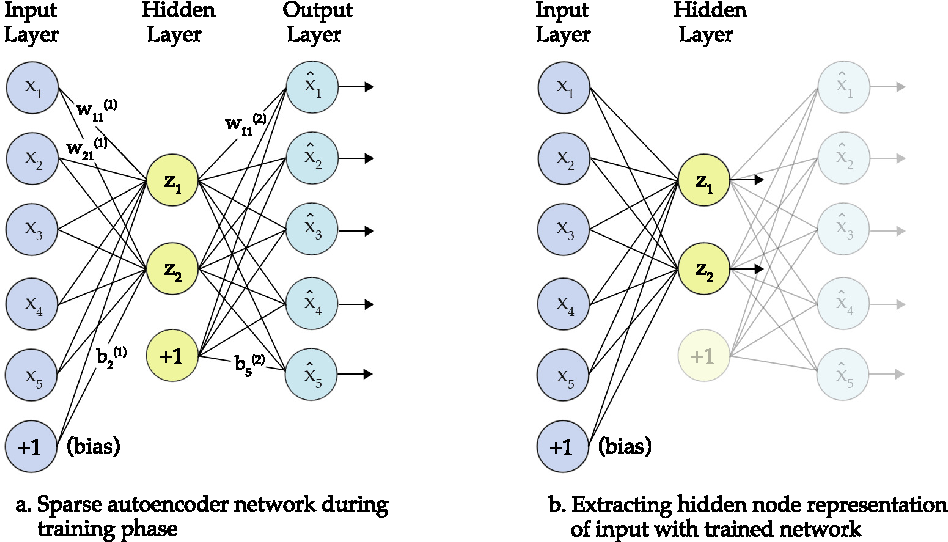

In [1]:
from IPython.display import Image
Image(filename='images/SA.png')

A Sparse Autoencoder is a type of autoencoder that has a sparsity constraint on the hidden layers. The architecture of a Sparse Autoencoder is similar to that of a Vanilla Autoencoder, with an input layer, one or more hidden layers, and an output layer. The difference lies in the addition of a sparsity constraint on the hidden layers.

Here's a high-level overview of the architecture:

1. **Input Layer**: The input layer takes in the high-dimensional input data. The size of the input layer corresponds to the number of features in the input data.

2. **Encoder (Hidden Layers)**: The encoder part of the autoencoder transforms the high-dimensional input data into a lower-dimensional representation. The encoder is typically a feed-forward neural network. In a Sparse Autoencoder, a sparsity constraint is added to the hidden layers, which means that only a small number of neurons are allowed to activate for a given input.

3. **Decoder (Hidden Layers)**: The decoder part of the autoencoder takes the lower-dimensional representation and transforms it back into the original high-dimensional space. The decoder is typically a feed-forward neural network that is symmetric to the encoder.

4. **Output Layer**: The output layer produces the reconstructed input data. The size of the output layer corresponds to the size of the input layer.

5. **Sparsity Constraint**: A sparsity constraint is added to the loss function, which penalizes the model if more than a certain number of neurons are active at the same time. This forces the autoencoder to learn more useful, high-level features in the data.

The goal of the Sparse Autoencoder is to minimize the difference between the input data and the reconstructed data (reconstruction error), subject to the sparsity constraint. This forces the autoencoder to learn a compressed representation of the input data that captures the most important features.

# Python Code Implementation:

Here's a simple implementation of a Sparse Autoencoder using Keras. This example uses the Kullback-Leibler (KL) divergence as the sparsity penalty.



In [4]:
from keras import regularizers
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input with a sparsity constraint
encoded = Dense(encoding_dim, activation='relu', 
                activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# prepare input data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# train autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

2023-12-26 22:55:42.700471: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-12-26 22:55:43.559797: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50
235/235 [==============================] - 5s 16ms/step - loss: 0.6966 - val_loss: 0.6966
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6964 - val_loss: 0.6964
Epoch 3/50
235/235 [==============================] - 3s 15ms/step - loss: 0.6962 - val_loss: 0.6962
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6960 - val_loss: 0.6960
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6958 - val_loss: 0.6958
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6956 - val_loss: 0.6956
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6954 - val_loss: 0.6954
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6952 - val_loss: 0.6952
Epoch 9/50
235/235 [==============================] - 2s 11ms/step - loss: 0.6950 - val_loss: 0.6950
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6949 - val_lo



In this code, the `activity_regularizer` argument in the `Dense` layer adds a sparsity constraint to the encoded representations. The `regularizers.l1(10e-5)` means that the L1 norm of the encoded representations is added to the loss function, which encourages sparsity in the encoded representations. You can adjust the `10e-5` value to increase or decrease the amount of sparsity.

# How can I visualize the encoded representations learned by a Sparse Autoencoder?

To visualize the encoded representations learned by a Sparse Autoencoder, you can create a separate encoder model that shares weights with the autoencoder. This encoder model will take an input image and output the encoded representation. You can then use this model to encode some test images and visualize the encoded representations.

Here's how you can do it:



313/313 [==============================] - 1s 2ms/step


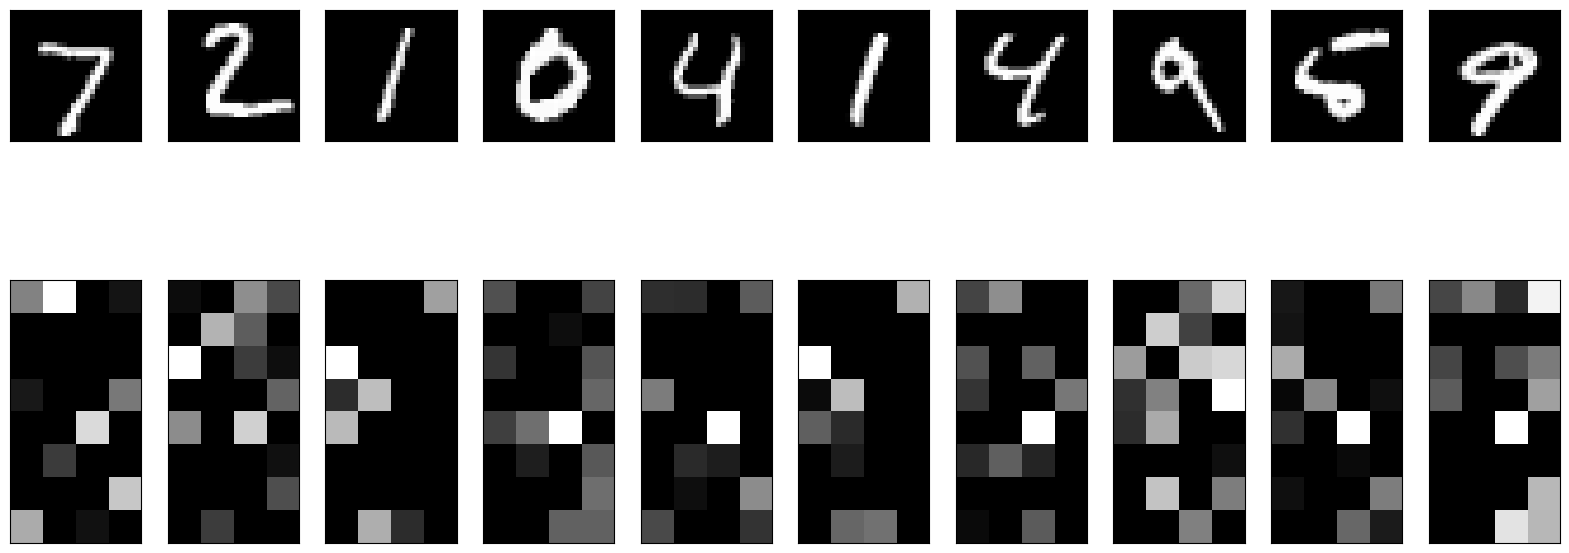

In [5]:
# create a separate encoder model
encoder = Model(input_img, encoded)

# encode some test images
encoded_imgs = encoder.predict(x_test)

# visualize the encoded representations
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded representation
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))  # reshape depending on your encoding_dim
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In this code, `encoder.predict(x_test)` is used to encode some test images. The encoded representations are then reshaped and displayed as images. The reshaping depends on your `encoding_dim`. For example, if `encoding_dim` is 32, you might reshape the encoded representations to (8, 4) for visualization.

# Application ?

Sparse Autoencoders have several applications in the field of machine learning and data science:

1. **Dimensionality Reduction**: Sparse Autoencoders can be used to reduce the dimensionality of data by learning a compressed, sparse representation of the input data. This can be useful for visualizing high-dimensional data or for preprocessing data before feeding it into another machine learning model.

2. **Anomaly Detection**: Sparse Autoencoders can be used for anomaly detection by training the autoencoder on normal data and then using the reconstruction error to detect anomalies. The idea is that the autoencoder will learn to reconstruct normal data well, but it will have a high reconstruction error for anomalous data.

3. **Feature Extraction**: The sparse encoded representations learned by a Sparse Autoencoder can be used as features for another machine learning model. These features can sometimes capture useful information that is not easily accessible from the raw data.

4. **Denoising**: Sparse Autoencoders can be used to remove noise from data. This is done by training the autoencoder on noisy data as input and clean data as output. The autoencoder will learn to map from the noisy data to the clean data, effectively learning to remove the noise.

5. **Image Compression**: Sparse Autoencoders can be used for image compression. The autoencoder learns to encode the input image into a lower-dimensional (and sparse) representation, and then decode this representation back into the original image. The encoded representation can be used as a compressed version of the image.

# **Thank You!**